# kNN and PCA for Time Series Prediction
In this notebook, we will combine k-Nearest Neighbors (kNN) and Principal Component Analysis (PCA) for time series prediction. The steps will be outlined along with the Python code implementation.

## Step 1: Generating Synthetic Time Series Data
We will first create a noisy sine wave, which will serve as our time series data for prediction.

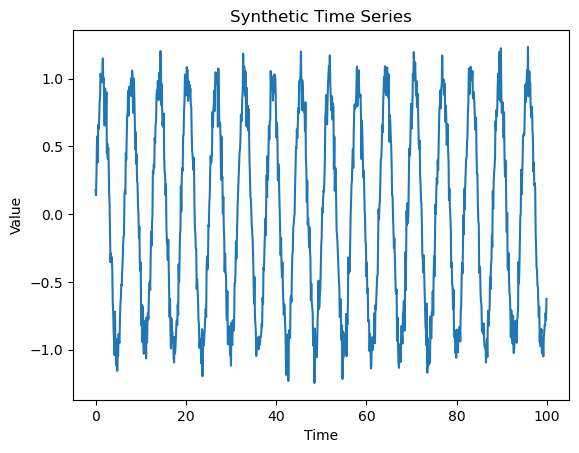

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(0)
time = np.arange(0, 100, 0.1)
series = np.sin(time) + 0.1 * np.random.randn(len(time))  # Sine wave with noise

# Plot the time series
plt.plot(time, series, label="Original Time Series")
plt.title("Synthetic Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


## Step 2: Create Lagged Features Using Sliding Window
Next, we'll create lagged features using a sliding window approach, which will help us use the past values of the time series to predict future values.

In [2]:
def create_lagged_features(series, window_size):
    # Create lagged features for time series data using a sliding window approach.
    # Parameters:
    # series (numpy array): The time series data.
    # window_size (int): The size of the sliding window.
    # Returns:
    # X (numpy array): Feature matrix where each row is a lagged version of the series.
    # y (numpy array): Target values, which are the next value in the series after the window.
    
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])  # Features are the past `window_size` values
        y.append(series[i + window_size])    # Target is the next value in the series
    return np.array(X), np.array(y)

# Set window size (the number of past observations to use)
window_size = 10
X, y = create_lagged_features(series, window_size)


## Step 3: Split the Data into Training and Testing Sets
We will split the dataset into training and testing sets, ensuring the data remains in temporal order by disabling shuffling.

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## Step 4: Apply PCA for Dimensionality Reduction
We apply PCA to reduce the dimensionality of the feature space, retaining the most significant components.

In [4]:
from sklearn.decomposition import PCA

n_components = 5  # Set the number of principal components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the explained variance ratio for each component
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")


Explained variance by each component: [0.90558139 0.0785588  0.00232935 0.00224902 0.0021712 ]


## Step 5: Apply kNN for Time Series Prediction
Using the reduced feature space, we now train a kNN model and make predictions on the test set.

In [5]:
from sklearn.neighbors import KNeighborsRegressor

# Apply kNN for time series prediction
k = 3  # Number of nearest neighbors
knn = KNeighborsRegressor(n_neighbors=k)

# Fit the kNN model on the PCA-transformed training data
knn.fit(X_train_pca, y_train)

# Predict on the PCA-transformed test data
y_pred = knn.predict(X_test_pca)


## Step 6: Evaluate the Model Performance
We will now evaluate the performance of the kNN model using the Mean Squared Error (MSE) and visualize the predicted vs. actual values.

Mean Squared Error: 0.015900916895818025


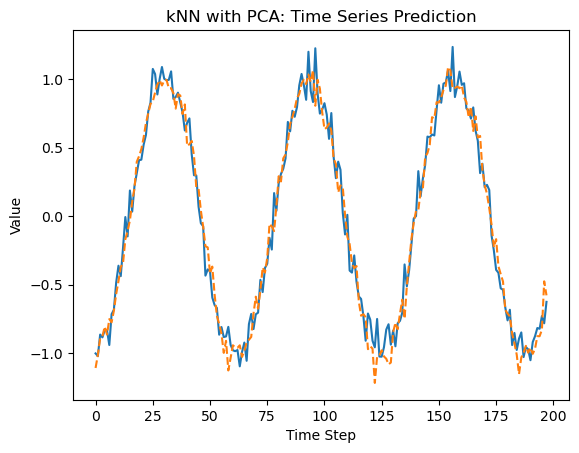

In [6]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the actual vs. predicted values
plt.plot(range(len(y_test)), y_test, label="Actual")
plt.plot(range(len(y_pred)), y_pred, label="Predicted", linestyle='--')
plt.title("kNN with PCA: Time Series Prediction")
plt.xlabel("Time Step")
plt.ylabel("Value")
#plt.legend()
plt.show()


## Key Points and Summary
- **Dimensionality Reduction with PCA**: PCA helped reduce the dimensionality of the input feature space from 10 to 5, while preserving most of the variance in the data.
- **kNN for Prediction**: We used kNN on the PCA-reduced space to predict future time steps, and evaluated the model using the Mean Squared Error (MSE).
- **Combining PCA with kNN**: This combination allows the kNN algorithm to work more efficiently in a lower-dimensional space, improving both the computational performance and predictive accuracy.